In [22]:
import requests
import pandas as pd
import numpy as np

API KEY

In [23]:
api_key = input("Inserte su API Key de Alpha Vantage: ")

INPUT SYMBOL

In [24]:
symbol = input("Inserte el ticker de la empresa: ").upper()

ELEGIR SI CARGAR LOS EXCEL DIRECTAMENTE O NO

In [25]:
while True:
  opcion = int(input("Si ya tiene los datos financieros de un proceso previo y los desea cargar para evitar utilizar la API, ingrese 1, de lo contrario ingrese 2: "))
  if opcion == 1 or opcion == 2:
    break
  else:
    print("Por favor ingrese una opción válida")

OUTPUT EXCELS

In [26]:
if opcion == 2:
  INCOME_STATEMENT = f'https://www.alphavantage.co/query?function=INCOME_STATEMENT&symbol={symbol}&apikey={api_key}'
  CASH_FLOW = f'https://www.alphavantage.co/query?function=CASH_FLOW&symbol={symbol}&apikey={api_key}'
  BALANCE_SHEET = f'https://www.alphavantage.co/query?function=BALANCE_SHEET&symbol={symbol}&apikey={api_key}'
  PRICES = f'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol={symbol}&outputsize=full&apikey={api_key}'

  r_INCOME_STATEMENT = requests.get(INCOME_STATEMENT)
  data_INCOME_STATEMENT = r_INCOME_STATEMENT.json()

  r_CASH_FLOW = requests.get(CASH_FLOW)
  data_CASH_FLOW = r_CASH_FLOW.json()

  r_BALANCE_SHEET = requests.get(BALANCE_SHEET)
  data_BALANCE_SHEET = r_BALANCE_SHEET.json()

  r_PRICES = requests.get(PRICES)
  data_PRICES = r_PRICES.json()

  if 'annualReports' in data_INCOME_STATEMENT:
      reports = data_INCOME_STATEMENT['annualReports']
      df = pd.DataFrame(reports)

      df.to_excel(f'{symbol}_INCOME_STATEMENT.xlsx')

  if 'annualReports' in data_CASH_FLOW:
      reports = data_CASH_FLOW['annualReports']
      df = pd.DataFrame(reports)

      df.to_excel(f'{symbol}_CASH_FLOW.xlsx')

  if 'annualReports' in data_BALANCE_SHEET:
      reports = data_BALANCE_SHEET['annualReports']
      df = pd.DataFrame(reports)

      df.to_excel(f'{symbol}_BALANCE_SHEET.xlsx')

  if 'Time Series (Daily)' in data_PRICES:
    time_series = data_PRICES['Time Series (Daily)']
    df = pd.DataFrame.from_dict(time_series, orient='index')
    df.index = pd.to_datetime(df.index)
    df = df[['4. close']].rename(columns={'4. close': 'Close'})

    df['Close'] = df['Close'].astype(float)

    df = df.sort_index()

    df.to_excel(f'{symbol}_precios.xlsx')

  else:
    print("No se encontraron datos de precios en la respuesta JSON")

else:
  print("No se corre este proceso")

No se corre este proceso


MODIFIQUE LOS EXCEL DE BALANCE SHEET, INCOME STATEMENT Y CASH FLOW PARA QUE SE VEAN COMO LA IMAGEN:

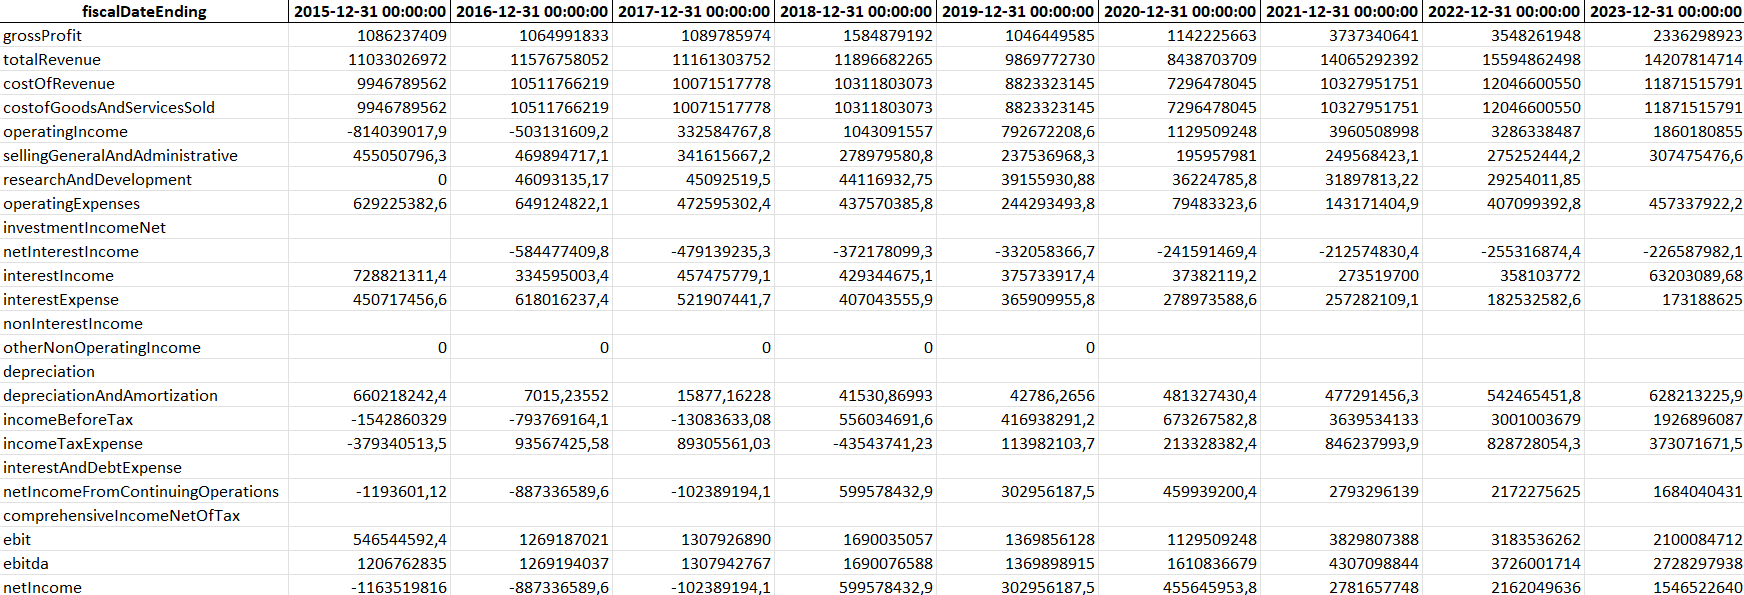

INPUTS EXCELS

In [27]:
input("Presione enter cuando finalice la modificación de excels")

# Cargar los archivos Excel en DataFrames
income_statement_df = pd.read_excel(f'{symbol}_INCOME_STATEMENT.xlsx')
cash_flow_df = pd.read_excel(f'{symbol}_CASH_FLOW.xlsx')
balance_sheet_df = pd.read_excel(f'{symbol}_BALANCE_SHEET.xlsx')
prices_df = pd.read_excel(f'{symbol}_precios.xlsx')


FILTRADO DE DATAFRAME INCOME STATEMENT

In [28]:
# Filtrar las filas de interés
filtered_df = income_statement_df[income_statement_df['fiscalDateEnding'].isin(['totalRevenue', 'ebit', 'ebitda'])]

# Renombrar las filas
filtered_df.loc[filtered_df['fiscalDateEnding'] == 'totalRevenue', 'fiscalDateEnding'] = 'Ingresos'
filtered_df.loc[filtered_df['fiscalDateEnding'] == 'ebit', 'fiscalDateEnding'] = 'EBIT'
filtered_df.loc[filtered_df['fiscalDateEnding'] == 'ebitda', 'fiscalDateEnding'] = 'EBITDA'

# Establecer el índice en 'fiscalDateEnding'
filtered_df.set_index('fiscalDateEnding', inplace=True)

# Crear una nueva fila "Amortizaciones y Depreciaciones"
filtered_df.loc['Amortizaciones y Depreciaciones'] = filtered_df.loc['EBITDA'] - filtered_df.loc['EBIT']

# Reordenar el dataframe para mantener el orden deseado
result_df = filtered_df.loc[['Ingresos', 'EBIT', 'Amortizaciones y Depreciaciones']]

# Resetear el índice si es necesario
result_df.reset_index(inplace=True)

# Mostrar el nuevo dataframe
print(result_df)

                  fiscalDateEnding    2010-06-30    2011-06-30    2012-06-30  \
0                         Ingresos  6.248400e+10  6.994300e+10  7.372300e+10   
1                             EBIT  2.516400e+10  2.836600e+10  2.264700e+10   
2  Amortizaciones y Depreciaciones  7.070000e+08  5.370000e+08  5.580000e+08   

     2013-06-30    2014-06-30    2015-06-30    2016-06-30    2017-06-30  \
0  7.784900e+10  8.683300e+10  9.358000e+10  9.115400e+10  9.657100e+10   
1  2.748100e+10  2.841700e+10  1.928800e+10  2.688200e+10  3.212300e+10   
2  7.390000e+08  8.450000e+08  1.300000e+09  9.780000e+08  1.700000e+09   

     2018-06-30    2019-06-30    2020-06-30    2021-06-30    2022-06-30  \
0  1.072220e+11  1.234950e+11  1.405030e+11  1.659360e+11  1.961090e+11   
1  3.920700e+10  4.637400e+10  5.562700e+10  7.344800e+10  8.577900e+10   
2  2.200000e+09  1.900000e+09  2.211000e+09  2.521000e+09  2.980000e+09   

     2023-06-30  
0  2.097470e+11  
1  9.127900e+10  
2  3.852000e+09  


C:\Users\nicos\AppData\Local\Temp\ipykernel_20692\2663275208.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.loc['Amortizaciones y Depreciaciones'] = filtered_df.loc['EBITDA'] - filtered_df.loc['EBIT']


% CRECIMIENTO DE VENTAS, % EBIT Y % DEPRECIACIONES

In [29]:
# Excluir las columnas proyectadas (últimas 5 columnas)
original_columns_count = len(filtered_df.columns) - 5
filtered_df_original = filtered_df.iloc[:, :original_columns_count]

# Crear un nuevo DataFrame con los cálculos necesarios
percentages_df = pd.DataFrame(columns=filtered_df_original.columns)

# Calcular porcentaje de EBIT/Ingresos para cada año
percentages_df.loc['EBIT/Ingresos'] = (filtered_df_original.loc['EBIT'] / filtered_df_original.loc['Ingresos']) * 100

# Calcular porcentaje de Amortizaciones y Depreciaciones/Ingresos para cada año
percentages_df.loc['Amortizaciones/Ingresos'] = (filtered_df_original.loc['Amortizaciones y Depreciaciones'] / filtered_df_original.loc['Ingresos']) * 100

# Calcular el crecimiento año a año de Ingresos
ingresos = filtered_df_original.loc['Ingresos']
crecimiento_anual = ingresos.pct_change().dropna() * 100  # Calcula el % de cambio y elimina NaN

# Definir los pesos para el promedio ponderado (los años más recientes tienen más peso)
num_years = len(crecimiento_anual)
weights = range(1, num_years + 1)

# Asegurar que weights y crecimiento_anual tengan la misma longitud
weights = list(weights)

# Calcular el promedio ponderado de crecimiento de Ingresos
weighted_crecimiento = crecimiento_anual * weights
promedio_ponderado_crecimiento = weighted_crecimiento.sum() / sum(weights)

# Calcular el promedio ponderado de EBIT/Ingresos
num_years_ebit = len(percentages_df.loc['EBIT/Ingresos'])
weights_ebit = range(1, num_years_ebit + 1)
weighted_ebit_ingresos = percentages_df.loc['EBIT/Ingresos'] * weights_ebit
average_ebit_ingresos = weighted_ebit_ingresos.sum() / sum(weights_ebit)

# Calcular el promedio ponderado de Amortizaciones/Ingresos
num_years_amort = len(percentages_df.loc['Amortizaciones/Ingresos'])
weights_amort = range(1, num_years_amort + 1)
weighted_amortizaciones_ingresos = percentages_df.loc['Amortizaciones/Ingresos'] * weights_amort
average_amortizaciones_ingresos = weighted_amortizaciones_ingresos.sum() / sum(weights_amort)

print("\nPromedio ponderado de crecimiento de Ingresos año a año: {:.2f}%".format(promedio_ponderado_crecimiento))
print("Promedio ponderado de EBIT/Ingresos: {:.2f}%".format(average_ebit_ingresos))
print("Promedio ponderado de Amortizaciones y Depreciaciones/Ingresos: {:.2f}%".format(average_amortizaciones_ingresos))


Promedio ponderado de crecimiento de Ingresos año a año: 6.63%
Promedio ponderado de EBIT/Ingresos: 32.08%
Promedio ponderado de Amortizaciones y Depreciaciones/Ingresos: 1.38%


INPUT % CRECIMIENTO DE VENTAS

In [30]:
print("Inserte el % de crecimiento de ventas para los próximos 5 años")
while True:
    try:
        ventas_1 = float(input("Año 1: "))
        ventas_2 = float(input("Año 2: "))
        ventas_3 = float(input("Año 3: "))
        ventas_4 = float(input("Año 4: "))
        ventas_5 = float(input("Año 5: "))
        break
    except ValueError:
        print("Por favor ingrese un dato válido")

# Calcular los factores de crecimiento
growth_ventas = [
    1 + (ventas_1 / 100),
    1 + (ventas_2 / 100),
    1 + (ventas_3 / 100),
    1 + (ventas_4 / 100),
    1 + (ventas_5 / 100)
]

print("Factores de crecimiento para los próximos 5 años:")
print(f"Ventas: {growth_ventas}")

Inserte el % de crecimiento de ventas para los próximos 5 años
Factores de crecimiento para los próximos 5 años:
Ventas: [1.05, 1.05, 1.05, 1.05, 1.05]


PROYECCIONES DE INGRESOS, EBIT Y DEPRECIACIONES

In [31]:
# Obtener la última fecha de la columna `Ingresos`
ultima_fecha = pd.to_datetime(result_df.columns[-1])

# Generar nuevas fechas para los próximos 5 años
nuevas_fechas = [(ultima_fecha + pd.DateOffset(years=i)).strftime('%Y-%m-%d') for i in range(1, 6)]

# Obtener el último valor de la columna `Ingresos`
ultimo_ingreso = result_df.loc[result_df['fiscalDateEnding'] == 'Ingresos'].iloc[0, -1]

# Agregar 5 nuevas columnas y calcular los valores de `Ingresos` para los próximos 5 años
for i, (growth, new_date) in enumerate(zip(growth_ventas, nuevas_fechas), start=1):
    result_df[new_date] = 0
    result_df.loc[result_df['fiscalDateEnding'] == 'Ingresos', new_date] = ultimo_ingreso * growth
    ultimo_ingreso *= growth

# Calcular los valores de `EBIT` y `Amortizaciones y Depreciaciones` para los próximos 5 años
for new_date in nuevas_fechas:
    result_df.loc[result_df['fiscalDateEnding'] == 'EBIT', new_date] = result_df.loc[result_df['fiscalDateEnding'] == 'Ingresos', new_date].values[0] * (average_ebit_ingresos / 100)
    result_df.loc[result_df['fiscalDateEnding'] == 'Amortizaciones y Depreciaciones', new_date] = result_df.loc[result_df['fiscalDateEnding'] == 'Ingresos', new_date].values[0] * (average_amortizaciones_ingresos / 100)

# Mostrar el DataFrame resultante
print(result_df)

                  fiscalDateEnding    2010-06-30    2011-06-30    2012-06-30  \
0                         Ingresos  6.248400e+10  6.994300e+10  7.372300e+10   
1                             EBIT  2.516400e+10  2.836600e+10  2.264700e+10   
2  Amortizaciones y Depreciaciones  7.070000e+08  5.370000e+08  5.580000e+08   

     2013-06-30    2014-06-30    2015-06-30    2016-06-30    2017-06-30  \
0  7.784900e+10  8.683300e+10  9.358000e+10  9.115400e+10  9.657100e+10   
1  2.748100e+10  2.841700e+10  1.928800e+10  2.688200e+10  3.212300e+10   
2  7.390000e+08  8.450000e+08  1.300000e+09  9.780000e+08  1.700000e+09   

     2018-06-30    2019-06-30    2020-06-30    2021-06-30    2022-06-30  \
0  1.072220e+11  1.234950e+11  1.405030e+11  1.659360e+11  1.961090e+11   
1  3.920700e+10  4.637400e+10  5.562700e+10  7.344800e+10  8.577900e+10   
2  2.200000e+09  1.900000e+09  2.211000e+09  2.521000e+09  2.980000e+09   

     2023-06-30    2024-06-30    2025-06-30    2026-06-30    2027-06-30  \
0 

C:\Users\nicos\AppData\Local\Temp\ipykernel_20692\3991427022.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '254948789418.75' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  result_df.loc[result_df['fiscalDateEnding'] == 'Ingresos', new_date] = ultimo_ingreso * growth
C:\Users\nicos\AppData\Local\Temp\ipykernel_20692\3991427022.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '267696228889.6875' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  result_df.loc[result_df['fiscalDateEnding'] == 'Ingresos', new_date] = ultimo_ingreso * growth
C:\Users\nicos\AppData\Local\Temp\ipykernel_20692\3991427022.py:18: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '70655

FILTRADO DE DATAFRAME BALANCE SHEET

In [32]:
# Filtrar balance_sheet_df para que solo queden `totalCurrentAssets`, `totalCurrentLiabilities`, `cashAndShortTermInvestments` y `shortTermDebt`
filtered_balance_sheet_df = balance_sheet_df.loc[balance_sheet_df['fiscalDateEnding'].isin(['totalCurrentAssets', 'totalCurrentLiabilities', 'cashAndShortTermInvestments', 'shortTermDebt'])]

# Renombrar las filas
filtered_balance_sheet_df['fiscalDateEnding'].replace({
    'totalCurrentAssets': 'Total Current Assets',
    'totalCurrentLiabilities': 'Total Current Liabilities',
    'cashAndShortTermInvestments': 'Cash and Short Term Investments',
    'shortTermDebt': 'Short Term Debt'
}, inplace=True)

# Establecer `fiscalDateEnding` como índice
filtered_balance_sheet_df.set_index('fiscalDateEnding', inplace=True)

C:\Users\nicos\AppData\Local\Temp\ipykernel_20692\3261596724.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  filtered_balance_sheet_df['fiscalDateEnding'].replace({
C:\Users\nicos\AppData\Local\Temp\ipykernel_20692\3261596724.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_balance_sheet_df['fiscalDateEnding'].replace({


FILTRAR SOLO LAS FECHAS QUE COINCIDEN ENTRE DATAFRAMES

In [33]:
# Verificar las fechas comunes entre `result_df` y `filtered_balance_sheet_df`
common_dates = result_df.columns.intersection(filtered_balance_sheet_df.columns)

# Filtrar `filtered_balance_sheet_df` para que solo contenga las fechas comunes
filtered_balance_sheet_df = filtered_balance_sheet_df[common_dates]

# Añadir las fechas de los próximos 5 años
last_date = pd.to_datetime(common_dates[-1])
next_dates = [last_date + pd.DateOffset(years=i) for i in range(1, 6)]
next_dates_str = [date.strftime('%Y-%m-%d') for date in next_dates]

# Añadir las nuevas columnas con valores en 0
for date in next_dates_str:
    filtered_balance_sheet_df[date] = 0

# Reordenar las columnas para que coincidan con el orden de `result_df` y las nuevas fechas
all_dates = list(common_dates) + next_dates_str
filtered_balance_sheet_df = filtered_balance_sheet_df[all_dates]

print(filtered_balance_sheet_df)

                                   2010-06-30    2011-06-30    2012-06-30  \
fiscalDateEnding                                                            
Total Current Assets             5.567600e+10  7.491800e+10  8.508400e+10   
Cash and Short Term Investments  3.678800e+10  5.277200e+10  6.304000e+10   
Total Current Liabilities        2.614700e+10  2.877400e+10  3.268800e+10   
Short Term Debt                  1.000000e+09  0.000000e+00 -2.644000e+09   

                                   2013-06-30    2014-06-30    2015-06-30  \
fiscalDateEnding                                                            
Total Current Assets             1.014660e+11  1.142460e+11  1.227970e+11   
Cash and Short Term Investments  7.702200e+10  8.570900e+10  9.652600e+10   
Total Current Liabilities        3.741700e+10  4.562500e+10  4.964700e+10   
Short Term Debt                  0.000000e+00  2.000000e+09  4.985000e+09   

                                   2016-06-30    2017-06-30    2018-06-30 

% CRECIMIENTO ACTIVOS Y PASIVOS CORRIENTES

In [34]:
# Filtrar balance_sheet_df para que solo queden `totalCurrentAssets`, `totalCurrentLiabilities`, `cashAndShortTermInvestments` y `shortTermDebt`
filtered_balance_sheet_df = balance_sheet_df.loc[balance_sheet_df['fiscalDateEnding'].isin(['totalCurrentAssets', 'totalCurrentLiabilities', 'cashAndShortTermInvestments', 'shortTermDebt'])]

# Renombrar las filas
filtered_balance_sheet_df['fiscalDateEnding'].replace({
    'totalCurrentAssets': 'Total Current Assets',
    'totalCurrentLiabilities': 'Total Current Liabilities',
    'cashAndShortTermInvestments': 'Cash and Short Term Investments',
    'shortTermDebt': 'Short Term Debt'
}, inplace=True)

# Establecer `fiscalDateEnding` como índice
filtered_balance_sheet_df.set_index('fiscalDateEnding', inplace=True)

# Convertir todas las columnas a `str` antes de ordenar
filtered_balance_sheet_df.columns = filtered_balance_sheet_df.columns.astype(str)
filtered_balance_sheet_df = filtered_balance_sheet_df.sort_index(axis=1)

# Calcular el porcentaje de variación año a año para todas las filas seleccionadas
pct_variation = filtered_balance_sheet_df.pct_change(axis=1) * 100

# Filtrar las filas necesarias
pct_variation = pct_variation.loc[['Total Current Assets', 'Total Current Liabilities', 'Cash and Short Term Investments', 'Short Term Debt']]

# Reemplazar NaN por 0 en `pct_variation` para hacer los cálculos
pct_variation = pct_variation.fillna(0)

# Excluir las columnas proyectadas (últimas 5 columnas)
original_columns_count = len(filtered_balance_sheet_df.columns) - 5
pct_variation_original = pct_variation.iloc[:, :original_columns_count]

# Calcular el promedio ponderado
weights = filtered_balance_sheet_df.iloc[:, 1:original_columns_count + 1].values  # Excluimos la primera columna porque no tiene un valor anterior para calcular el cambio

# Asegurar que los tamaños coinciden y calcular el promedio ponderado para cada fila
def weighted_avg_variation(row_name):
    variation = pct_variation_original.loc[row_name].values
    row_weights = weights[pct_variation_original.index.tolist().index(row_name), :len(variation)]
    return (variation * row_weights).sum() / row_weights.sum()

weighted_avg_assets = weighted_avg_variation('Total Current Assets')
weighted_avg_liabilities = weighted_avg_variation('Total Current Liabilities')
weighted_avg_cash = weighted_avg_variation('Cash and Short Term Investments')
weighted_avg_debt = weighted_avg_variation('Short Term Debt')

print(f"Promedio ponderado del % de variación de Total Current Assets: {weighted_avg_assets:.2f}%")
print(f"Promedio ponderado del % de variación de Total Current Liabilities: {weighted_avg_liabilities:.2f}%")
print(f"Promedio ponderado del % de variación de Cash and Short Term Investments: {weighted_avg_cash:.2f}%")
print(f"Promedio ponderado del % de variación de Short Term Debt: {weighted_avg_debt:.2f}%")

Promedio ponderado del % de variación de Total Current Assets: 13.00%
Promedio ponderado del % de variación de Total Current Liabilities: 9.54%
Promedio ponderado del % de variación de Cash and Short Term Investments: 14.86%
Promedio ponderado del % de variación de Short Term Debt: nan%


C:\Users\nicos\AppData\Local\Temp\ipykernel_20692\768474637.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  filtered_balance_sheet_df['fiscalDateEnding'].replace({
C:\Users\nicos\AppData\Local\Temp\ipykernel_20692\768474637.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_balance_sheet_df['fiscalDateEnding'].replace({
C:\Users\

INPUT % CRECIMIENTO ACTIVOS Y PASIVOS CORRIENTES

In [35]:
print("Inserte el % de crecimiento de activos corrientes para los próximos 5 años")
while True:
    try:
        activos_corrientes_1 = float(input("Año 1: "))
        activos_corrientes_2 = float(input("Año 2: "))
        activos_corrientes_3 = float(input("Año 3: "))
        activos_corrientes_4 = float(input("Año 4: "))
        activos_corrientes_5 = float(input("Año 5: "))
        break
    except ValueError:
        print("Por favor ingrese un dato válido")

# Calcular los factores de crecimiento
growth_activos_corrientes = [
    1 + (activos_corrientes_1 / 100),
    1 + (activos_corrientes_2 / 100),
    1 + (activos_corrientes_3 / 100),
    1 + (activos_corrientes_4 / 100),
    1 + (activos_corrientes_5 / 100)
]

print("Inserte el % de crecimiento de pasivos corrientes para los próximos 5 años")
while True:
    try:
        pasivos_corrientes_1 = float(input("Año 1: "))
        pasivos_corrientes_2 = float(input("Año 2: "))
        pasivos_corrientes_3 = float(input("Año 3: "))
        pasivos_corrientes_4 = float(input("Año 4: "))
        pasivos_corrientes_5 = float(input("Año 5: "))
        break
    except ValueError:
        print("Por favor ingrese un dato válido")

# Calcular los factores de crecimiento
growth_pasivos_corrientes = [
    1 + (pasivos_corrientes_1 / 100),
    1 + (pasivos_corrientes_2 / 100),
    1 + (pasivos_corrientes_3 / 100),
    1 + (pasivos_corrientes_4 / 100),
    1 + (pasivos_corrientes_5 / 100)
]

print("Inserte el % de crecimiento de inversiones a corto plazo para los próximos 5 años")
while True:
    try:
        Efectivo_y_Equivalentes_1 = float(input("Año 1: "))
        Efectivo_y_Equivalentes_2 = float(input("Año 2: "))
        Efectivo_y_Equivalentes_3 = float(input("Año 3: "))
        Efectivo_y_Equivalentes_4 = float(input("Año 4: "))
        Efectivo_y_Equivalentes_5 = float(input("Año 5: "))
        break
    except ValueError:
        print("Por favor ingrese un dato válido")

# Calcular los factores de crecimiento
growth_Efectivo_y_Equivalentes = [
    1 + (Efectivo_y_Equivalentes_1 / 100),
    1 + (Efectivo_y_Equivalentes_2 / 100),
    1 + (Efectivo_y_Equivalentes_3 / 100),
    1 + (Efectivo_y_Equivalentes_4 / 100),
    1 + (Efectivo_y_Equivalentes_5 / 100)
]

print("Inserte el % de crecimiento de deuda a corto plazo para los próximos 5 años")
while True:
    try:
        deuda_corto_plazo_1 = float(input("Año 1: "))
        deuda_corto_plazo_2 = float(input("Año 2: "))
        deuda_corto_plazo_3 = float(input("Año 3: "))
        deuda_corto_plazo_4 = float(input("Año 4: "))
        deuda_corto_plazo_5 = float(input("Año 5: "))
        break
    except ValueError:
        print("Por favor ingrese un dato válido")

# Calcular los factores de crecimiento
growth_deuda_corto_plazo = [
    1 + (deuda_corto_plazo_1 / 100),
    1 + (deuda_corto_plazo_2 / 100),
    1 + (deuda_corto_plazo_3 / 100),
    1 + (deuda_corto_plazo_4 / 100),
    1 + (deuda_corto_plazo_5 / 100)
]

print("Factores de crecimiento para los próximos 5 años:")
print(f"Activos corrientes: {growth_activos_corrientes}")
print(f"Pasivos corrientes: {growth_pasivos_corrientes}")
print(f"Efectivo y Equivalentes: {growth_Efectivo_y_Equivalentes}")
print(f"Deuda a corto plazo: {growth_deuda_corto_plazo}")

Inserte el % de crecimiento de activos corrientes para los próximos 5 años
Inserte el % de crecimiento de pasivos corrientes para los próximos 5 años
Inserte el % de crecimiento de inversiones a corto plazo para los próximos 5 años
Inserte el % de crecimiento de deuda a corto plazo para los próximos 5 años
Factores de crecimiento para los próximos 5 años:
Activos corrientes: [1.01, 1.01, 1.01, 1.01, 1.01]
Pasivos corrientes: [1.02, 1.02, 1.02, 1.02, 1.02]
Efectivo y Equivalentes: [1.01, 1.01, 1.01, 1.01, 1.01]
Deuda a corto plazo: [1.02, 1.02, 1.02, 1.02, 1.02]


PROYECCIONES DE ACTIVOS Y PASIVOS CORRIENTES

In [36]:
# Últimos valores de activos corrientes, pasivos corrientes, efectivo y equivalentes, y deuda a corto plazo
last_year = filtered_balance_sheet_df.columns[-6]  # Último año con datos originales
last_assets = filtered_balance_sheet_df.loc['Total Current Assets', last_year]
last_liabilities = filtered_balance_sheet_df.loc['Total Current Liabilities', last_year]
last_cash = filtered_balance_sheet_df.loc['Cash and Short Term Investments', last_year]
last_debt = filtered_balance_sheet_df.loc['Short Term Debt', last_year]

# Calcular las proyecciones para los próximos 5 años
projections_assets = [last_assets]
projections_liabilities = [last_liabilities]
projections_cash = [last_cash]
projections_debt = [last_debt]

for i in range(5):
    last_assets *= growth_activos_corrientes[i]
    last_liabilities *= growth_pasivos_corrientes[i]
    last_cash *= growth_Efectivo_y_Equivalentes[i]
    last_debt *= growth_deuda_corto_plazo[i]
    projections_assets.append(last_assets)
    projections_liabilities.append(last_liabilities)
    projections_cash.append(last_cash)
    projections_debt.append(last_debt)

# Añadir las proyecciones al DataFrame
for i, date in enumerate(next_dates_str):
    filtered_balance_sheet_df.at['Total Current Assets', date] = projections_assets[i + 1]
    filtered_balance_sheet_df.at['Total Current Liabilities', date] = projections_liabilities[i + 1]
    filtered_balance_sheet_df.at['Cash and Short Term Investments', date] = projections_cash[i + 1]
    filtered_balance_sheet_df.at['Short Term Debt', date] = projections_debt[i + 1]

AÑADIR WORKING CAPITAL Y VAR. DE WORKING CAPITAL

In [37]:
# Cálculo del Working Capital Operativo
filtered_balance_sheet_df.loc['Working Capital Operativo'] = (
    (filtered_balance_sheet_df.loc['Total Current Assets'] - filtered_balance_sheet_df.loc['Cash and Short Term Investments']) - 
    (filtered_balance_sheet_df.loc['Total Current Liabilities'] - filtered_balance_sheet_df.loc['Short Term Debt'])
)

# Cálculo de la Variación del Working Capital Operativo (en valores nominales)
working_capital_operativo = filtered_balance_sheet_df.loc['Working Capital Operativo']
working_capital_operativo_variation = working_capital_operativo.diff().fillna(0)  # Utilizamos diff() para calcular la variación año a año

filtered_balance_sheet_df.loc['Var. del Working Capital Operativo'] = working_capital_operativo_variation

print(filtered_balance_sheet_df)

                                      2010-06-30    2011-06-30    2012-06-30  \
fiscalDateEnding                                                               
Total Current Assets                5.567600e+10  7.491800e+10  8.508400e+10   
Cash and Short Term Investments     3.678800e+10  5.277200e+10  6.304000e+10   
Total Current Liabilities           2.614700e+10  2.877400e+10  3.268800e+10   
Short Term Debt                     1.000000e+09  0.000000e+00 -2.644000e+09   
Working Capital Operativo          -6.259000e+09 -6.628000e+09 -1.328800e+10   
Var. del Working Capital Operativo  0.000000e+00 -3.690000e+08 -6.660000e+09   

                                      2013-06-30    2014-06-30    2015-06-30  \
fiscalDateEnding                                                               
Total Current Assets                1.014660e+11  1.142460e+11  1.227970e+11   
Cash and Short Term Investments     7.702200e+10  8.570900e+10  9.652600e+10   
Total Current Liabilities           3.7

FILTRADO DE DATAFRAME CASH FLOW

In [38]:
# Filtrar cash_flow_df para que solo quede `capitalExpenditures`
filtered_cash_flow_df = cash_flow_df[cash_flow_df['fiscalDateEnding'] == 'capitalExpenditures']

# Renombrar la fila
filtered_cash_flow_df['fiscalDateEnding'].replace({
    'capitalExpenditures': 'CAPEX'
}, inplace=True)

# Establecer `fiscalDateEnding` como índice
filtered_cash_flow_df.set_index('fiscalDateEnding', inplace=True)

# Mostrar el DataFrame resultante
print(filtered_cash_flow_df)

                    2010-06-30    2011-06-30    2012-06-30    2013-06-30  \
fiscalDateEnding                                                           
CAPEX             1.977000e+09  2.355000e+09  2.305000e+09  4.257000e+09   

                    2014-06-30    2015-06-30    2016-06-30    2017-06-30  \
fiscalDateEnding                                                           
CAPEX             5.485000e+09  5.944000e+09  8.343000e+09  8.129000e+09   

                    2018-06-30    2019-06-30    2020-06-30    2021-06-30  \
fiscalDateEnding                                                           
CAPEX             1.163200e+10  1.392500e+10  1.544100e+10  2.062200e+10   

                    2022-06-30    2023-06-30  
fiscalDateEnding                              
CAPEX             2.388600e+10  2.810700e+10  


C:\Users\nicos\AppData\Local\Temp\ipykernel_20692\279701070.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  filtered_cash_flow_df['fiscalDateEnding'].replace({
C:\Users\nicos\AppData\Local\Temp\ipykernel_20692\279701070.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_cash_flow_df['fiscalDateEnding'].replace({


FILTRAR SOLO LAS FECHAS QUE COINCIDEN ENTRE DATAFRAMES

In [39]:
# Verificar las fechas comunes entre `result_df` y `filtered_cash_flow_df`
common_dates = result_df.columns.intersection(filtered_cash_flow_df.columns)

# Filtrar `filtered_cash_flow_df` para que solo contenga las fechas comunes
filtered_cash_flow_df = filtered_cash_flow_df[common_dates]

# Añadir las fechas de los próximos 5 años
last_date = pd.to_datetime(common_dates[-1])
next_dates = [last_date + pd.DateOffset(years=i) for i in range(1, 6)]
next_dates_str = [date.strftime('%Y-%m-%d') for date in next_dates]

# Añadir las nuevas columnas con valores en 0
for date in next_dates_str:
    filtered_cash_flow_df[date] = 0

# Reordenar las columnas para que coincidan con el orden de `result_df` y las nuevas fechas
all_dates = list(common_dates) + next_dates_str
filtered_cash_flow_df = filtered_cash_flow_df[all_dates]

% CRECIMIENTO CAPEX

In [40]:
# Convertir todas las columnas a `str` antes de ordenar
filtered_cash_flow_df.columns = filtered_cash_flow_df.columns.astype(str)
filtered_cash_flow_df = filtered_cash_flow_df.sort_index(axis=1)

# Calcular el porcentaje de variación año a año para `CAPEX`
pct_variation_capex = filtered_cash_flow_df.pct_change(axis=1) * 100

# Reemplazar NaN por 0 en `pct_variation_capex` para hacer los cálculos
pct_variation_capex = pct_variation_capex.fillna(0)

# Excluir las columnas proyectadas (últimas 5 columnas)
original_columns_count = len(filtered_cash_flow_df.columns) - 5
pct_variation_capex_original = pct_variation_capex.iloc[:, :original_columns_count]

# Calcular el promedio ponderado
weights_capex = filtered_cash_flow_df.iloc[:, 1:original_columns_count + 1].values[0]  # Excluimos la primera columna porque no tiene un valor anterior para calcular el cambio

# Asegurar que los tamaños coinciden
capex_variation = pct_variation_capex_original.loc['CAPEX'].values
weights_capex = weights_capex[:len(capex_variation)]

weighted_avg_capex = (capex_variation * weights_capex).sum() / weights_capex.sum()

print(f"Promedio ponderado del % de variación de CAPEX: {weighted_avg_capex:.2f}%")

Promedio ponderado del % de variación de CAPEX: 22.70%


INPUT % CRECIMIENTO CAPEX

In [41]:
print("Inserte el % de crecimiento de CAPEX para los próximos 5 años")
while True:
    try:
        CAPEX_1 = float(input("Año 1: "))
        CAPEX_2 = float(input("Año 2: "))
        CAPEX_3 = float(input("Año 3: "))
        CAPEX_4 = float(input("Año 4: "))
        CAPEX_5 = float(input("Año 5: "))
        break
    except ValueError:
        print("Por favor ingrese un dato válido")

# Calcular los factores de crecimiento
growth_CAPEX = [
    1 + (CAPEX_1 / 100),
    1 + (CAPEX_2 / 100),
    1 + (CAPEX_3 / 100),
    1 + (CAPEX_4 / 100),
    1 + (CAPEX_5 / 100)
]

print("Factores de crecimiento para los próximos 5 años:")
print(f"CAPEX: {growth_CAPEX}")

Inserte el % de crecimiento de CAPEX para los próximos 5 años
Factores de crecimiento para los próximos 5 años:
CAPEX: [1.1, 1.1, 1.1, 1.1, 1.1]


PROYECCIONES DE CAPEX

In [42]:
# Convertir todas las columnas a `str` antes de realizar operaciones
filtered_cash_flow_df.columns = filtered_cash_flow_df.columns.astype(str)

# Último valor de CAPEX
last_year = filtered_cash_flow_df.columns[-6]  # Ultimo año con datos originales
last_capex = filtered_cash_flow_df.loc['CAPEX', last_year]

# Calcular las proyecciones para los próximos 5 años
projections_capex = [last_capex]

for i in range(5):
    last_capex *= growth_CAPEX[i]
    projections_capex.append(last_capex)

# Añadir las proyecciones al DataFrame
for i, date in enumerate(next_dates_str):
    filtered_cash_flow_df.at['CAPEX', date] = projections_capex[i + 1]

# Reordenar las columnas para que coincidan con el orden de `result_df` y las nuevas fechas
# Convertir common_dates y next_dates_str a str
common_dates_str = [str(date) for date in common_dates]
all_dates = common_dates_str + next_dates_str
filtered_cash_flow_df = filtered_cash_flow_df[all_dates]

# Mostrar el nuevo DataFrame con las proyecciones añadidas
print(filtered_cash_flow_df)

                    2010-06-30    2011-06-30    2012-06-30    2013-06-30  \
fiscalDateEnding                                                           
CAPEX             1.977000e+09  2.355000e+09  2.305000e+09  4.257000e+09   

                    2014-06-30    2015-06-30    2016-06-30    2017-06-30  \
fiscalDateEnding                                                           
CAPEX             5.485000e+09  5.944000e+09  8.343000e+09  8.129000e+09   

                    2018-06-30    2019-06-30    2020-06-30    2021-06-30  \
fiscalDateEnding                                                           
CAPEX             1.163200e+10  1.392500e+10  1.544100e+10  2.062200e+10   

                    2022-06-30    2023-06-30    2024-06-30    2025-06-30  \
fiscalDateEnding                                                           
CAPEX             2.388600e+10  2.810700e+10  3.091770e+10  3.400947e+10   

                    2026-06-30    2027-06-30    2028-06-30  
fiscalDateEnding       

C:\Users\nicos\AppData\Local\Temp\ipykernel_20692\633383661.py:17: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '30917700000.000004' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  filtered_cash_flow_df.at['CAPEX', date] = projections_capex[i + 1]
C:\Users\nicos\AppData\Local\Temp\ipykernel_20692\633383661.py:17: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '34009470000.000008' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  filtered_cash_flow_df.at['CAPEX', date] = projections_capex[i + 1]
C:\Users\nicos\AppData\Local\Temp\ipykernel_20692\633383661.py:17: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '37410417000.00001' has dtype incompatible with int64, please

% IMPUESTO A LAS GANANCIAS

In [43]:
# Filtrar el DataFrame para que solo queden las filas donde la segunda columna es 'ebit' o 'incomeTaxExpense'
filtered_tax_df = income_statement_df[
    income_statement_df['fiscalDateEnding'].isin(['ebit', 'incomeTaxExpense'])
]

# Renombrar 'incomeTaxExpense' por '% Impuestos' y 'ebit' por 'EBIT'
filtered_tax_df['fiscalDateEnding'] = filtered_tax_df['fiscalDateEnding'].replace({
    'incomeTaxExpense': 'Provision de Impuestos',
    'ebit': 'EBIT'
})

# Asegurarse de que las filas estén en el orden correcto
filtered_tax_df = filtered_tax_df.set_index('fiscalDateEnding')
filtered_tax_df = filtered_tax_df.loc[['EBIT', 'Provision de Impuestos']]

# Calcular el porcentaje de impuestos para cada año
filtered_tax_df.loc['% Impuestos Calculado'] = (filtered_tax_df.loc['Provision de Impuestos'] /
                                                filtered_tax_df.loc['EBIT'])

# Resetear el índice para que 'fiscalDateEnding' vuelva a ser una columna
filtered_tax_df = filtered_tax_df.reset_index()

# Asegurarnos de que el DataFrame está en el formato correcto
filtered_tax_df = filtered_tax_df.set_index('fiscalDateEnding')

# Extraer la fila '% Impuestos Calculado'
tax_percentage = filtered_tax_df.loc['% Impuestos Calculado']

# Definir los pesos para cada año (más recientes tienen más peso)
num_years = len(tax_percentage)
weights = range(1, num_years + 1)

# Asegurar que los pesos y los porcentajes tengan la misma longitud
weights = list(weights)

# Calcular el promedio ponderado del porcentaje de impuestos
weighted_sum = sum(tax_percentage * weights)
sum_of_weights = sum(weights)
promedio_ponderado_impuestos = weighted_sum / sum_of_weights

# Mostrar el promedio ponderado del porcentaje de impuestos
print(f"Promedio ponderado del % de impuestos: {promedio_ponderado_impuestos * 100:.2f}%")

Promedio ponderado del % de impuestos: 19.60%


C:\Users\nicos\AppData\Local\Temp\ipykernel_20692\701470108.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_tax_df['fiscalDateEnding'] = filtered_tax_df['fiscalDateEnding'].replace({


INPUT % IMPUESTOS

In [44]:
print("Inserte el % de impuestos para los próximos 5 años")
while True:
    try:
        IIGG_1 = float(input("Año 1: "))
        IIGG_2 = float(input("Año 2: "))
        IIGG_3 = float(input("Año 3: "))
        IIGG_4 = float(input("Año 4: "))
        IIGG_5 = float(input("Año 5: "))
        break
    except ValueError:
        print("Por favor ingrese un dato válido")

# Calcular los factores de crecimiento
growth_IIGG = [
    (IIGG_1 / 100),
    (IIGG_2 / 100),
    (IIGG_3 / 100),
    (IIGG_4 / 100),
    (IIGG_5 / 100)
]

print("Factores de crecimiento para los próximos 5 años:")
print(f"Impuesto a las Ganancias: {growth_IIGG}")

Inserte el % de impuestos para los próximos 5 años
Factores de crecimiento para los próximos 5 años:
Impuesto a las Ganancias: [0.3, 0.3, 0.3, 0.3, 0.3]


PROYECCIONES IMPUESTOS

In [45]:
# Asegurarse de que 'fiscalDateEnding' esté presente en las columnas
if 'fiscalDateEnding' in filtered_tax_df.columns:
    filtered_tax_df = filtered_tax_df.set_index('fiscalDateEnding')

# Asegurarse de que las filas estén en el orden correcto
filtered_tax_df = filtered_tax_df.loc[['Provision de Impuestos', '% Impuestos Calculado']]

# Extraer el EBIT proyectado para los próximos 5 años de las últimas 5 columnas de `result_df`
ebit_proyectado = result_df.loc[result_df.iloc[:, 0] == 'EBIT', result_df.columns[-5:]]
fechas_proyectadas = ebit_proyectado.columns

# Añadir las fechas proyectadas a filtered_tax_df
for fecha in fechas_proyectadas:
    filtered_tax_df[fecha] = None

# Añadir los valores de % Impuestos Calculado a filtered_tax_df
filtered_tax_df.loc['% Impuestos Calculado', fechas_proyectadas] = growth_IIGG

# Calcular y añadir los valores de Provision de Impuestos a filtered_tax_df
for fecha in fechas_proyectadas:
    filtered_tax_df.loc['Provision de Impuestos', fecha] = (
        ebit_proyectado.iloc[0][fecha] * filtered_tax_df.loc['% Impuestos Calculado', fecha]
    )

# Mostrar el DataFrame actualizado
print(filtered_tax_df)

                          2010-06-30    2011-06-30    2012-06-30  \
fiscalDateEnding                                                   
Provision de Impuestos  6.253000e+09  4.921000e+09  5.289000e+09   
% Impuestos Calculado   2.484899e-01  1.734823e-01  2.335409e-01   

                          2013-06-30    2014-06-30    2015-06-30  \
fiscalDateEnding                                                   
Provision de Impuestos  5.189000e+09  5.746000e+09  6.314000e+09   
% Impuestos Calculado   1.888214e-01  2.022029e-01  3.273538e-01   

                          2016-06-30    2017-06-30    2018-06-30  \
fiscalDateEnding                                                   
Provision de Impuestos  5.100000e+09  4.412000e+09  1.990300e+10   
% Impuestos Calculado   1.897180e-01  1.373471e-01  5.076389e-01   

                          2019-06-30    2020-06-30    2021-06-30  \
fiscalDateEnding                                                   
Provision de Impuestos  4.448000e+09  8.75500

INPUT % WACC

In [46]:

print("A continuación le pediremos el WACC para descontar los 5 años proyectados")
while True:
    try:
        WACC = float(input("Inserte el WACC "))
        WACC = WACC / 100
        break
    except ValueError:
        print("Por favor ingrese un dato válido")

A continuación le pediremos el WACC para descontar los 5 años proyectados


TOTAL VALOR PRESENTE

In [49]:
# Obtener los valores de las columnas proyectadas
fechas_proyectadas = result_df.columns[-5:]

# Crear un DataFrame vacío con las filas y columnas especificadas
filas = ['NOPAT', 'Depreciación', 'Var. Working Capital', 'Capital Expenditures', 'Unlevered Free Cash Flow', 'Valor Presente']
valor_presente = pd.DataFrame(index=filas, columns=fechas_proyectadas)

# Verificar la existencia de 'EBIT' y 'Provision de Impuestos'
if 'EBIT' in result_df.iloc[:, 0].values and 'Provision de Impuestos' in filtered_tax_df.index:
    # Calcular NOPAT correctamente
    valor_presente.loc['NOPAT', fechas_proyectadas] = result_df.loc[result_df.iloc[:, 0] == 'EBIT', fechas_proyectadas].values[0] - filtered_tax_df.loc['Provision de Impuestos', fechas_proyectadas].values
else:
    raise KeyError("Las filas 'EBIT' o 'Provision de Impuestos' no se encuentran en los DataFrames correspondientes.")

# Agregar Depreciación
if 'Amortizaciones y Depreciaciones' in result_df.iloc[:, 0].values:
    valor_presente.loc['Depreciación', fechas_proyectadas] = result_df.loc[result_df.iloc[:, 0] == 'Amortizaciones y Depreciaciones', fechas_proyectadas].values[0]
else:
    raise KeyError("La fila 'Amortizaciones y Depreciaciones' no se encuentra en result_df.")

# Agregar Var. Working Capital con signo contrario
if 'Var. del Working Capital Operativo' in filtered_balance_sheet_df.index:
    valor_presente.loc['Var. Working Capital Operativo', fechas_proyectadas] = -filtered_balance_sheet_df.loc['Var. del Working Capital Operativo', fechas_proyectadas].values
else:
    raise KeyError("La fila 'Var. del Working Capital Operativo' no se encuentra en filtered_balance_sheet_df.")

# Agregar Capital Expenditures con signo contrario
if 'CAPEX' in filtered_cash_flow_df.index:
    valor_presente.loc['Capital Expenditures', fechas_proyectadas] = -filtered_cash_flow_df.loc['CAPEX', fechas_proyectadas].values
else:
    raise KeyError("La fila 'CAPEX' no se encuentra en filtered_cash_flow_df.")

# Calcular Unlevered Free Cash Flow sumando las filas anteriores
valor_presente.loc['Unlevered Free Cash Flow', fechas_proyectadas] = (
    valor_presente.loc['NOPAT', fechas_proyectadas].values +
    valor_presente.loc['Depreciación', fechas_proyectadas].values +
    valor_presente.loc['Var. Working Capital Operativo', fechas_proyectadas].values +
    valor_presente.loc['Capital Expenditures', fechas_proyectadas].values
)

# Calcular Valor Presente
for i, fecha in enumerate(fechas_proyectadas, start=1):
    valor_presente.loc['Valor Presente', fecha] = valor_presente.loc['Unlevered Free Cash Flow', fecha] / ((1 + WACC) ** i)

# Sumar todos los valores de la fila 'Valor Presente' y almacenar en una variable
suma_valor_presente = valor_presente.loc['Valor Presente', fechas_proyectadas].sum()

# Mostrar el DataFrame resultante y la suma de Valor Presente
print(valor_presente)
print(" ")
print(" ")
print(f"Suma de Valor Presente: {suma_valor_presente}")

                                        2024-06-30          2025-06-30  \
NOPAT                           49458588236.690826  51931517648.525368   
Depreciación                     3034104392.797934    3185809612.43783   
Var. Working Capital                           NaN                 NaN   
Capital Expenditures           -30917700000.000004 -34009470000.000008   
Unlevered Free Cash Flow        13825812629.488758  21938483060.963188   
Valor Presente                  12568920572.262506   18130977736.33321   
Var. Working Capital Operativo       -7749180000.0         830625800.0   

                                        2026-06-30          2027-06-30  \
NOPAT                           54528093530.951645  57254498207.499222   
Depreciación                     3345100093.059722   3512355097.712708   
Var. Working Capital                           NaN                 NaN   
Capital Expenditures           -37410417000.000008 -41151458700.000015   
Unlevered Free Cash Flow         2131

INPUT % CRECIMIENTO A PERPETUIDAD

In [50]:
while True:
    try:
        growing_perpetuity  = float(input("Inserte el % de crecimiento a perpetuidad: "))
        growing_perpetuity = growing_perpetuity / 100
        break
    except ValueError:
        print("Por favor ingrese un dato válido")

VALOR TERMINAL

In [51]:
# Extraer el valor de la última columna de Unlevered Free Cash Flow
ultimo_unlevered_free_cash_flow = valor_presente.loc['Unlevered Free Cash Flow'].iloc[-1]

ultimo_unlevered_free_cash_flow = ultimo_unlevered_free_cash_flow * (1 + growing_perpetuity)

# Calcular el valor terminal
valor_terminal = ultimo_unlevered_free_cash_flow / (WACC - growing_perpetuity)

# Calcular el Valor Presente del Valor Terminal
valor_presente_valor_terminal = valor_terminal / ((1 + WACC) ** 5)

# Mostrar el resultado
print(f"El Valor Presente del Valor Terminal es: {valor_presente_valor_terminal}")

El Valor Presente del Valor Terminal es: 153832389254.15543


DEUDA NETA Y ACCIONES

In [52]:
# Extraer el valor de la última columna de 'commonStockSharesOutstanding'
acciones = balance_sheet_df.loc[balance_sheet_df.iloc[:, 0] == 'commonStockSharesOutstanding'].iloc[0, -1]

# Extraer los valores de las últimas columnas de 'shortLongTermDebtTotal' y 'cashAndShortTermInvestments'
short_long_term_debt_total = balance_sheet_df.loc[balance_sheet_df.iloc[:, 0] == 'shortLongTermDebtTotal'].iloc[0, -1]
cash_and_short_term_investments = balance_sheet_df.loc[balance_sheet_df.iloc[:, 0] == 'cashAndShortTermInvestments'].iloc[0, -1]

# Calcular deuda_neta como la diferencia entre 'shortLongTermDebtTotal' y 'cashAndShortTermInvestments'
deuda_neta = short_long_term_debt_total - cash_and_short_term_investments

# Mostrar los resultados
print(f"Acciones: {acciones}")
print(f"Deuda Neta: {deuda_neta}")

Acciones: 7432000000.0
Deuda Neta: -64025000000.0


***VALOR DEL EQUITY***

In [53]:
valor_equity = suma_valor_presente + valor_presente_valor_terminal - deuda_neta
print(f"El valor del equity es: ${valor_equity}")
print(" ")
valor_intrinseco_por_accion = valor_equity / acciones
print(f"El valor intrínseco por acción es: ${valor_intrinseco_por_accion}")

El valor del equity es: $290628680017.033
 
El valor intrínseco por acción es: $39.10504305934244


***MARGEN DE SEGURIDAD***

In [54]:
# Extraer precio
ultimo_precio = prices_df.iloc[-1, 1]

# Mostrar el resultado
print(f"El último precio fue: ${ultimo_precio}")

margen_seguridad = (valor_intrinseco_por_accion - ultimo_precio) / valor_intrinseco_por_accion

print(f"El margen de seguridad es: % {margen_seguridad * 100}")

El último precio fue: $413.29
El margen de seguridad es: % -956.8713589519048


***ANALISIS DE SENSIBILIDAD***

In [55]:
# Parámetros para el análisis de sensibilidad
WACC_variaciones = np.linspace(WACC - 0.02, WACC + 0.02, 5)
growing_perpetuity_variaciones = np.linspace(growing_perpetuity - 0.01, growing_perpetuity + 0.01, 5)

# Crear DataFrame para almacenar los resultados
analisis_sensibilidad_precio = pd.DataFrame(index=[f'WACC={wacc:.2%}' for wacc in WACC_variaciones],
                                     columns=[f'g={gp:.2%}' for gp in growing_perpetuity_variaciones])

# Calcular el valor intrínseco por acción para cada combinación de WACC y growing perpetuity
for wacc in WACC_variaciones:
    for gp in growing_perpetuity_variaciones:
        valor_terminal = ultimo_unlevered_free_cash_flow / (wacc - gp)
        valor_presente_valor_terminal = valor_terminal / ((1 + wacc) ** 5)
        valor_equity = suma_valor_presente + valor_presente_valor_terminal - deuda_neta
        valor_intrinseco_por_accion = valor_equity / acciones
        analisis_sensibilidad_precio.loc[f'WACC={wacc:.2%}', f'g={gp:.2%}'] = valor_intrinseco_por_accion

# Mostrar el DataFrame de análisis de sensibilidad
print("Análisis de Sensibilidad del Valor Intrínseco:")
print(analisis_sensibilidad_precio)
print(" ")

# Crear DataFrame para almacenar los resultados
analisis_sensibilidad_margen = pd.DataFrame(index=[f'WACC={wacc:.2%}' for wacc in WACC_variaciones],
                                     columns=[f'g={gp:.2%}' for gp in growing_perpetuity_variaciones])

# Calcular el margen de seguridad para cada combinación de WACC y growing perpetuity
for wacc in WACC_variaciones:
    for gp in growing_perpetuity_variaciones:
        valor_terminal = ultimo_unlevered_free_cash_flow / (wacc - gp)
        valor_presente_valor_terminal = valor_terminal / ((1 + wacc) ** 5)
        valor_equity = suma_valor_presente + valor_presente_valor_terminal - deuda_neta
        valor_intrinseco_por_accion = valor_equity / acciones
        margen_seguridad = (valor_intrinseco_por_accion - ultimo_precio) / valor_intrinseco_por_accion
        analisis_sensibilidad_margen.loc[f'WACC={wacc:.2%}', f'g={gp:.2%}'] = margen_seguridad * 100

# Mostrar el DataFrame de análisis de sensibilidad
print(" ")
print("Análisis de Sensibilidad del Margen de Seguridad:")
print(analisis_sensibilidad_margen)

Análisis de Sensibilidad del Valor Intrínseco:
               g=1.00%    g=1.50%    g=2.00%    g=2.50%    g=3.00%
WACC=8.00%   44.334967  46.329473  48.656396  51.406397  54.706398
WACC=9.00%   40.072105  41.516486  43.167207  45.071885   47.29401
WACC=10.00%  36.805193  37.887475  39.105043  40.484953  42.061993
WACC=11.00%  34.232734    35.0657  35.991217  37.025618   38.18932
WACC=12.00%   32.16304  32.818119  33.538705  34.335143  35.220074
 
 
Análisis de Sensibilidad del Margen de Seguridad:
                 g=1.00%      g=1.50%      g=2.00%      g=2.50%      g=3.00%
WACC=8.00%   -832.198734  -792.067134  -749.405281  -703.966092  -655.469229
WACC=9.00%    -931.36584  -895.484065   -857.41659  -816.957432  -773.873886
WACC=10.00% -1022.912202  -990.835421  -956.871359  -920.848406  -882.573496
WACC=11.00% -1107.294745 -1078.616154  -1048.30794 -1016.227138  -982.213558
WACC=12.00%  -1184.98424 -1159.334822 -1132.277737 -1103.693834 -1073.450125
